In [7]:
import numpy as np
import cv2
from torch.fft import fft2, fftshift
import matplotlib.pyplot as plt
from PIL import Image
from torchmetrics.image import PeakSignalNoiseRatio
import torch

In [8]:
def compute_fourier_mag_spectrum(img):
    f = fft2(img)
    fshift = fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift) + 1)
    return magnitude_spectrum

In [9]:
path = "/home/jakobtroidl/Desktop/neural-volumes/logs/hemibrain-volume-noisy-test-gradient-regularizer/results_iteration_42/16280_20860_19143/result/result_0_psnr_21,828529870804964.png"
image1 = torch.from_numpy(cv2.imread(path, cv2.IMREAD_GRAYSCALE))

path = "/home/jakobtroidl/Desktop/neural-volumes/logs/hemibrain-volume-noisy-test-gradient-regularizer/results_iteration_42/16280_20860_19143/gt/gt_0.png"
image2 = torch.from_numpy(cv2.imread(path, cv2.IMREAD_GRAYSCALE))

psnr = PeakSignalNoiseRatio()

psnr_im = psnr(image1, image2)

im1_spectrum = compute_fourier_mag_spectrum(image1)
im2_spectrum = compute_fourier_mag_spectrum(image2)

psnr_spectrum = psnr(im1_spectrum, im2_spectrum)

print("PSNR of the image: ", psnr_im)
print("PSNR of the magnitude spectrum: ", psnr_spectrum)


PSNR of the image:  tensor(28.7878)
PSNR of the magnitude spectrum:  tensor(16.7273)


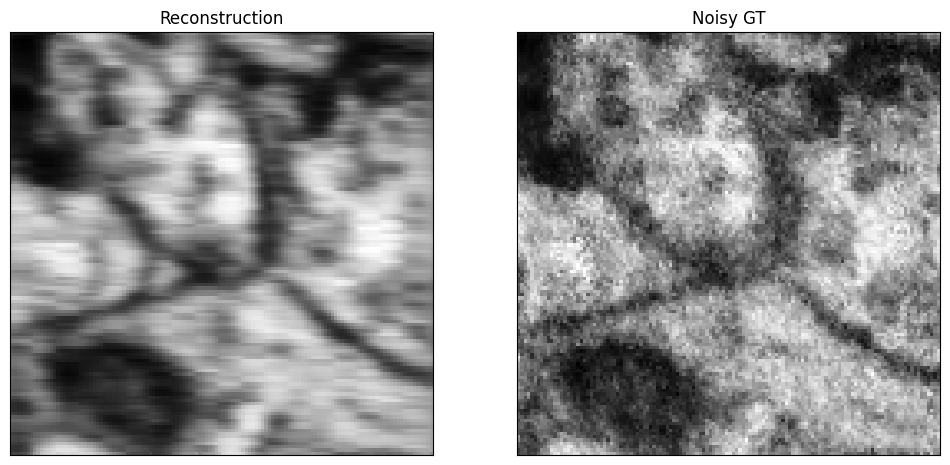

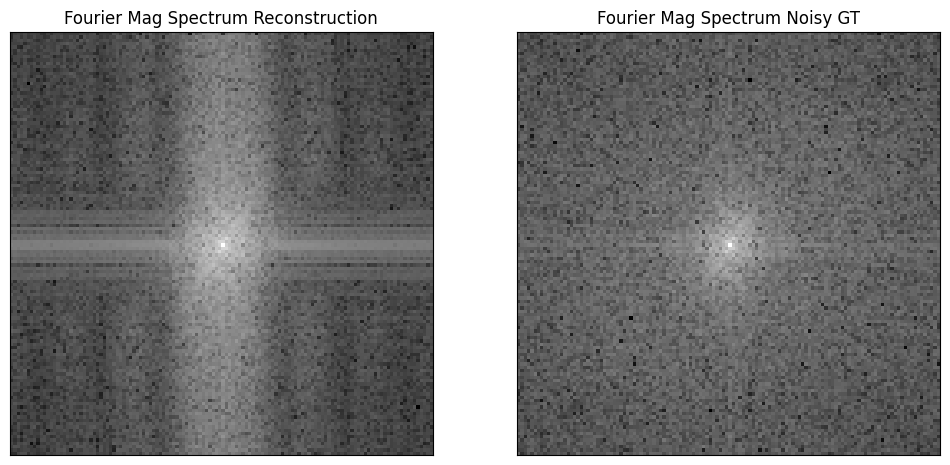

In [15]:
# Display the original, denoised images, and the difference
plt.figure(figsize=(12, 6))

plt.subplot(121), plt.imshow(image1.squeeze().cpu().detach().numpy(), cmap='gray')
plt.title('Reconstruction'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(image2.squeeze().cpu().detach().numpy(), cmap='gray')
plt.title('Noisy GT'), plt.xticks([]), plt.yticks([])

plt.show()


# Display the original, denoised images, and the difference
plt.figure(figsize=(12, 6))

plt.subplot(121), plt.imshow(im1_spectrum.squeeze().cpu().detach().numpy(), cmap='gray')
plt.title('Fourier Mag Spectrum Reconstruction'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(im2_spectrum.squeeze().cpu().detach().numpy(), cmap='gray')
plt.title('Fourier Mag Spectrum Noisy GT'), plt.xticks([]), plt.yticks([])

plt.show()



## Fourier-based denoising 

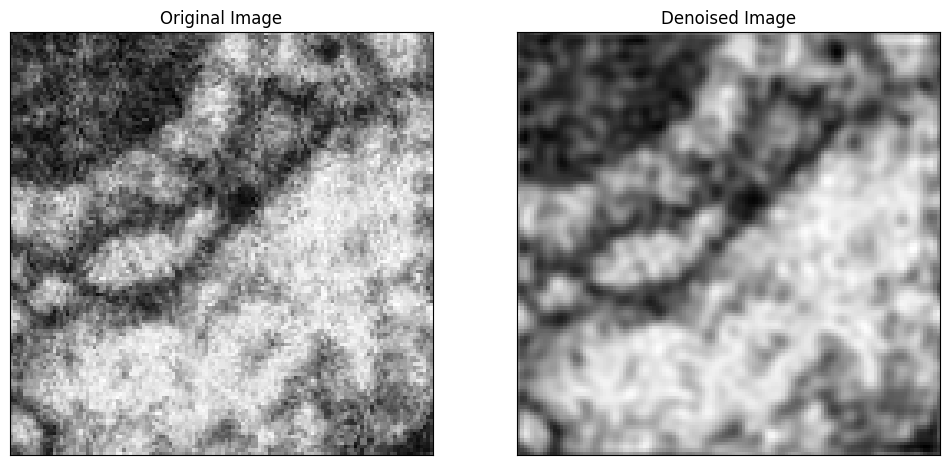

In [4]:
# Load the image (converting to grayscale)
image = Image.open(path).convert('L')
image_np = np.array(image)

# Compute the 2D Fourier Transform of the image
f_transform = np.fft.fft2(image_np)
f_shifted = np.fft.fftshift(f_transform)

# Create a low-pass filter mask (circular mask)
rows, cols = image_np.shape
crow, ccol = rows // 2 , cols // 2
radius = 25 # Radius of the low-pass filter, adjust as needed
low_pass = np.zeros((rows, cols), dtype=np.uint8)
y, x = np.ogrid[:rows, :cols]
mask_area = (x - ccol) ** 2 + (y - crow) ** 2 <= radius**2
low_pass[mask_area] = 1

# Apply the mask/filter
f_shifted_filtered = f_shifted * low_pass

# Inverse Fourier Transform to get the denoised image back
f_ishifted = np.fft.ifftshift(f_shifted_filtered)
img_back = np.fft.ifft2(f_ishifted)
img_back = np.abs(img_back)

# Display the original and denoised images
plt.figure(figsize=(12, 6))

plt.subplot(121), plt.imshow(image_np, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Denoised Image'), plt.xticks([]), plt.yticks([])

plt.show()


(128, 128)
(128,)


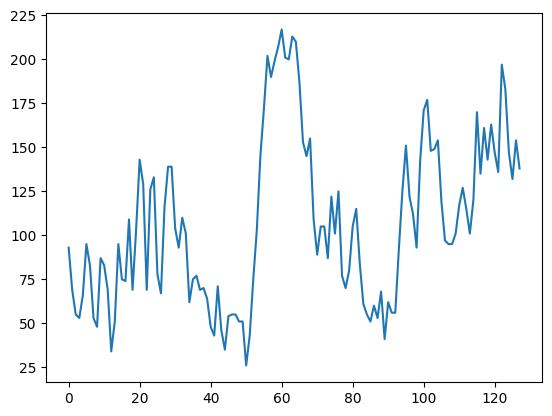

In [8]:
print(image_np.shape)
# get n-th row from the image
row = image_np[20].squeeze()
print(row.shape)
# plot values of row as a linechart
plt.plot(row)
plt.show()

(128, 128)
(128,)


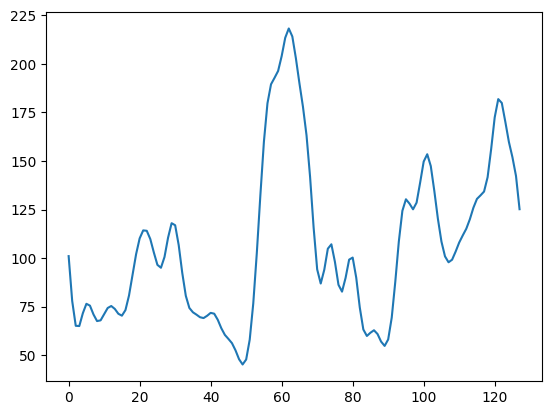

In [9]:
print(img_back.shape)
# get n-th row from the image
row = img_back[20].squeeze()
print(row.shape)
# plot values of row as a linechart
plt.plot(row)
plt.show()